In [3]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 880.3 kB/s eta 0:00:00a 0:00:01


In [4]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
import re
import string


In [11]:
data_folder = "şarkılar" 


def load_lyrics_from_folder(folder_path):
    lyrics_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".json"):
            with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
                data = json.load(f)
                lyrics = data.get("lyrics", "")
                title = data.get("title", "")
                artist = data.get("artist", "")
                lyrics_data.append({
                    "title": title,
                    "artist": artist,
                    "lyrics": lyrics
                })
    return pd.DataFrame(lyrics_data)


df_raw = load_lyrics_from_folder(data_folder)


print("Toplam şarkı sayısı:", df_raw.shape[0])
df_raw.head()


Toplam şarkı sayısı: 721


,title,artist,lyrics
0,Küçük Sevgilim,Mor ve Ötesi,9 ContributorsKüçük Sevgilim Lyrics\n\nBenim k...
1,Gözlerimin Etrafındaki Çizgiler,Şebnem Ferah,4 ContributorsGözlerimin Etrafındaki Çizgiler ...
2,Bu Rap Muharebe,Ceza,17 ContributorsBu Rap Muharebe Lyrics\n\nİstis...
3,Feryat,Hadise,5 ContributorsFeryat Lyrics\n\nKaç iskele görd...
4,Sarmaşık,Mabel Matiz,5 ContributorsSarmaşık Lyrics\n\nÖyle bir taht...


In [13]:
print("🎵 Şarkı adı:", df_raw.iloc[0]['title'])
print("🎤 Sanatçı:", df_raw.iloc[0]['artist'])
print("\n🎼 Sözler:\n", df_raw.iloc[0]['lyrics'][:1000])  


🎵 Şarkı adı: Küçük Sevgilim
🎤 Sanatçı: Mor ve Ötesi

🎼 Sözler:
 9 ContributorsKüçük Sevgilim Lyrics

Benim küçük sevgilim
Sen bana neler yaptın
Böldün parça parça
Onlar bilmez, onlar bilmez
Bakarlar yüzüme
Sanki yoksun gibi
Sanki yalanmışız gibi

Benim küçük sevgilim
Sen bana neler yaptın
Kırdın defalarca
Onlar bilmez, onlar bilmez
Vururlar yüzüme
Sanki yoksun gibi
Sanki yalanmışız gibi


Benim küçük sevgilim
Ben sana neler yaptım
Kızdım sayfalarca
Onlar bilmez, onlar bilmez
Yakarlar canımı
Sanki yoksun gibi
Sanki yalanmışız gibi

Benim küçük sevgilim
Sanki yalanmış gibi
Benim küçük sevgilim
Sanki masalmış gibi
Benim küçük sevgilim
Sanki yalanmış gibi
Benim küçük sevgilim
Haa-haa, haa-haa
Haa-haa, haa-haa
Haa-haa, haa-haa
Haa-haa, haa-haa


In [17]:
all_text = " ".join(df_raw["lyrics"].dropna().tolist())

all_text = all_text.lower()
all_text = all_text.translate(str.maketrans("", "", string.punctuation))

words = all_text.split()

word_freq = Counter(words)


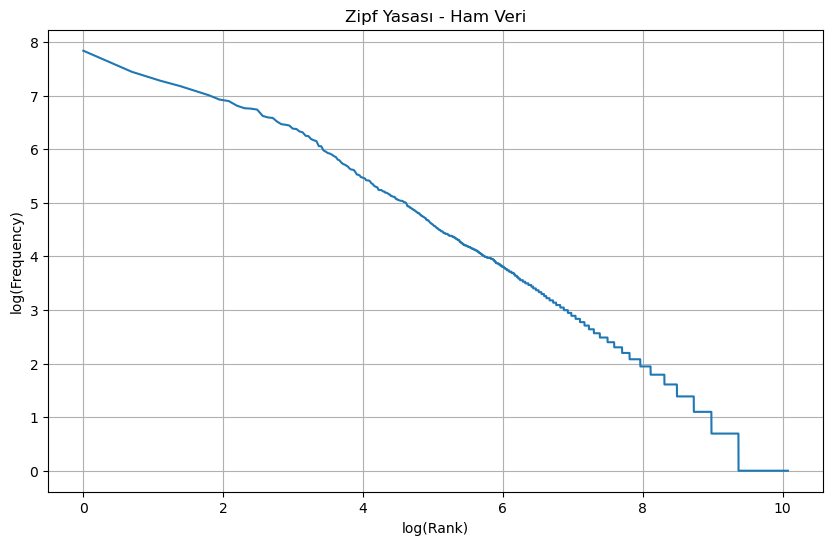

In [19]:
sorted_freqs = sorted(word_freq.values(), reverse=True)
ranks = np.arange(1, len(sorted_freqs) + 1)
frequencies = np.array(sorted_freqs)

plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(frequencies))
plt.title("Zipf Yasası - Ham Veri")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.grid(True)
plt.show()


In [21]:
!pip install nltk
!pip install snowballstemmer
!pip install trnlp


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from trnlp import TrnlpWord

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yusufbeken/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yusufbeken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('turkish'))

lyrics_list = df_raw["lyrics"].dropna().tolist()

def remove_stopwords(text):
    tokens = word_tokenize(text.lower())  
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df_raw["tokens_no_stop"] = df_raw["lyrics"].dropna().apply(remove_stopwords)

df_raw[["title", "tokens_no_stop"]].head()


,title,tokens_no_stop
0,Küçük Sevgilim,"[contributorsküçük, sevgilim, lyrics, benim, k..."
1,Gözlerimin Etrafındaki Çizgiler,"[contributorsgözlerimin, etrafındaki, çizgiler..."
2,Bu Rap Muharebe,"[contributorsbu, rap, muharebe, lyrics, mi, vu..."
3,Feryat,"[contributorsferyat, lyrics, kaç, iskele, görd..."
4,Sarmaşık,"[contributorssarmaşık, lyrics, öyle, bir, taht..."


In [31]:
from trnlp import TrnlpWord

def lemmatize_tokens(tokens):
    lemmas = []
    for token in tokens:
        word = TrnlpWord()
        word.setword(token)
        if word.get_lemmas(): 
            lemmas.append(word.get_lemmas()[0]) 
        else:
            lemmas.append(token) 
    return lemmas


In [37]:
!pip install zeyrek


In [43]:
import zeyrek

analyzer = zeyrek.MorphAnalyzer()

def lemmatize_with_zeyrek(tokens):
    lemmas = []
    for token in tokens:
        results = analyzer.analyze(token)
        if results:
            lemmas.append(results[0].lemma)
        else:
            lemmas.append(token)
    return lemmas


In [53]:
!pip install nltk


In [59]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yusufbeken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
pip install trnlp


Note: you may need to restart the kernel to use updated packages.


In [85]:
word = TrnlpWord()
word.setword("geliyorum")
print(dir(word)) 
print(word.__dict__)  


['_BaseFinder__useAbbr', '_BaseFinder__useMain', '_BaseFinder__usePron', '_TrnlpWord__getBase', '_TrnlpWord__getBaseType', '_TrnlpWord__getStem', '_TrnlpWord__getStemType', '_TrnlpWord__inf', '_TrnlpWord__morphology', '_orgWord', '_sorting', '_word']
{'_BaseFinder__useMain': True, '_BaseFinder__usePron': True, '_BaseFinder__useAbbr': False, '_orgWord': 'geliyorum', '_sorting': {('gel', 'fiil'): 1}, '_word': 'geliyorum', '_TrnlpWord__inf': [{'base': 'gel', 'verifiedBase': 'gel', 'baseType': ['fiil'], 'baseProp': ['GZ[ir]'], 'etymon': 'Türkçe', 'event': 0, 'currentType': ['fiil', 'fiil', 'fiil'], 'purview': '0', 'orgWord': 'geliyorum', 'word': 'geliyorum', 'suffixes': ['iyor', 'um'], 'suffixPlace': [(2, 3), (2, 20)], 'suffixTypes': ['Şz', 'Ke1t'], 'suffixProp': [(0, 6, 7), (0, 6)], 'residual': ''}, {'base': 'gel', 'verifiedBase': 'gel', 'baseType': ['fiil'], 'baseProp': ['GZ[ir]'], 'etymon': 'Türkçe', 'event': 0, 'currentType': ['fiil', 'fiil', 'fiil'], 'purview': '0', 'orgWord': 'geliyo

In [81]:
def stem_tokens_trnlp(tokens):
    stemmed_tokens = []
    for token in tokens:
        word = TrnlpWord()
        word.setword(token)
        stem = getattr(word, "_TrnlpWord__getStem", None)
        if stem:
            stemmed_tokens.append(stem)
        else:
            stemmed_tokens.append(token)
    return stemmed_tokens


In [83]:
df_raw["stemmed_trnlp"] = df_raw["tokens_no_stop"].apply(stem_tokens_trnlp)


In [87]:
df_raw["stemmed_trnlp"]


0      [contributorsküçük, sevgili, lyrics, ben, küçü...
1      [contributorsgözlerimin, etraf, çizgi, lyrics,...
2      [contributorsbu, rap, muharebe, lyrics, mi, vu...
3      [contributorsferyat, lyrics, kaç, iskele, gör,...
4      [contributorssarmaşık, lyrics, öyle, bir, taht...
                             ...                        
716    [contributorstranslationsenglishsır, lyrics, b...
717    [contributorkukla, lyrics, dara, ra, ra, ra, d...
718    [contributorshaykıracak, nefes, kal, bile, lyr...
719    [contributorssen, yorul, lyrics, olmamış, yanı...
720    [contributorsbaşıma, bela, lyrics, ra, ra, ben...
Name: stemmed_trnlp, Length: 721, dtype: object

In [89]:
df_raw["processed_text"] = df_raw["stemmed_trnlp"].apply(lambda x: " ".join(x))


In [93]:
from gensim.models import Word2Vec


model = Word2Vec(sentences=df_raw["stemmed_trnlp"], vector_size=100, window=5, min_count=2, workers=4)


In [95]:
import numpy as np

def get_average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df_raw["vector"] = df_raw["stemmed_trnlp"].apply(lambda x: get_average_vector(x, model))


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(list(df_raw["vector"]))


In [101]:
index = 0  # İlk şarkı
df_raw["similarity_to_first"] = similarity_matrix[index]
df_raw.sort_values("similarity_to_first", ascending=False)[["title", "similarity_to_first"]].head(10)


,title,similarity_to_first
0,Küçük Sevgilim,1.000000
372,Holigan,0.999458
468,Sana Bana Yeter (Le Vent Du Sud),0.999441
107,Peri,0.999422
497,O Yaz,0.999422
387,Önce Kendine Bak,0.999390
554,Saat 03:00,0.999385
643,Çocuklar Ve Hayvanlar,0.999374
678,Sana Neler Edeceğim,0.999344
193,Mavi Kuş ile Küçük Kız,0.999343


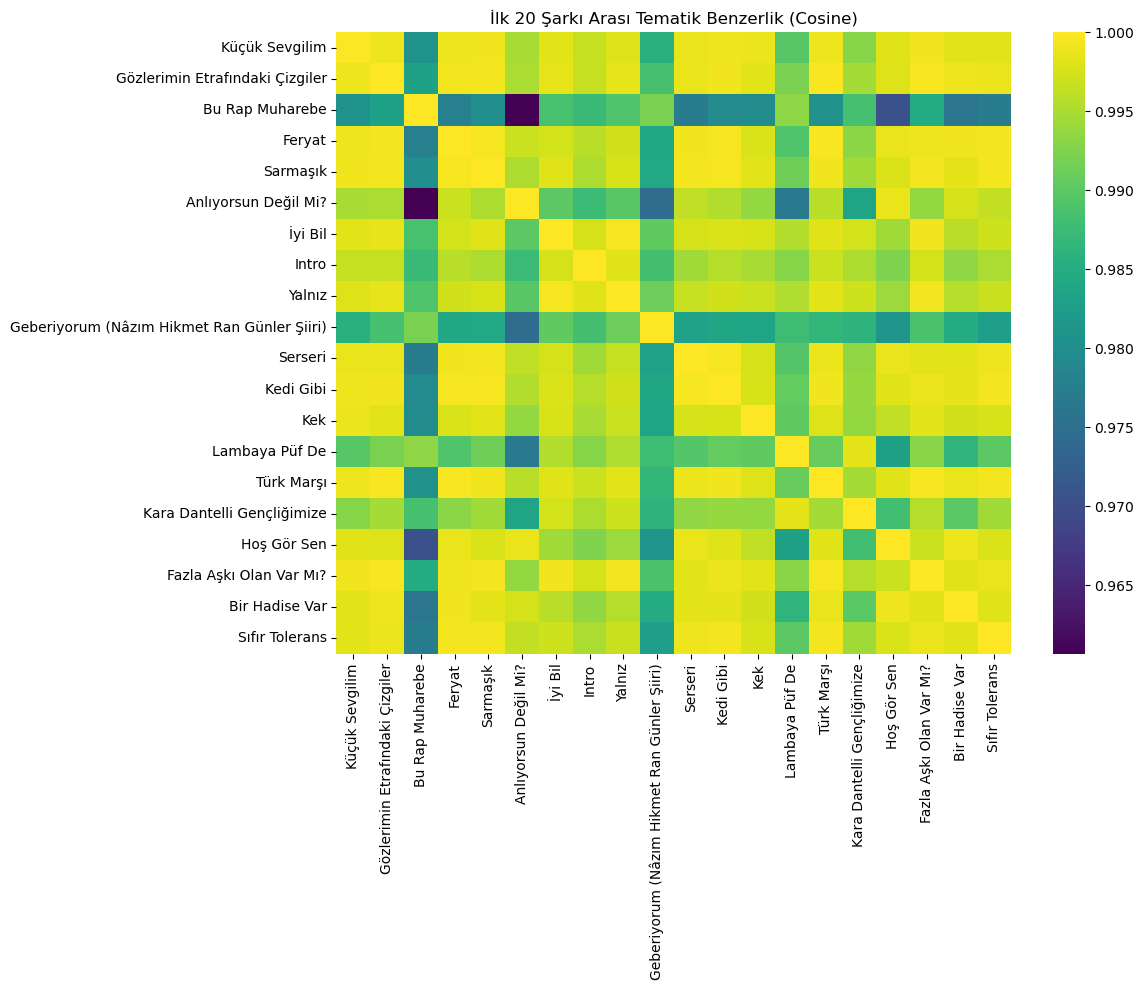

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix[:20, :20], 
            xticklabels=df_raw["title"][:20], 
            yticklabels=df_raw["title"][:20],
            cmap="viridis", annot=False)

plt.title("İlk 20 Şarkı Arası Tematik Benzerlik (Cosine)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [105]:
import numpy as np

def find_top_similar_pairs(similarity_matrix, titles, top_n=10):
    pairs = []
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            sim = similarity_matrix[i, j]
            pairs.append((titles[i], titles[j], sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    return pairs[:top_n]

top_similar_pairs = find_top_similar_pairs(similarity_matrix, df_raw["title"].tolist(), top_n=10)

for title1, title2, score in top_similar_pairs:
    print(f"{title1} ↔ {title2} | Benzerlik: {score:.3f}")


Uzun İnce Bir Yoldayım ↔ Uzun İnce Bir Yoldayım | Benzerlik: 1.000
Düşünme Hiç (Il Cigno Dell’Amore) ↔ Düşünme Hiç | Benzerlik: 1.000
Masum Değiliz ↔ Masum Değiliz | Benzerlik: 1.000
İstanbul’da Sonbahar ↔ İstanbul’da Sonbahar | Benzerlik: 1.000
My Man and the Devil on His Shoulder ↔ Never Trust a Man | Benzerlik: 1.000
Sarı Çizmeli Mehmet Ağa ↔ Yaz Dostum | Benzerlik: 1.000
A Song For My Mother ↔ Sweat | Benzerlik: 1.000
We Could Be the Same ↔ My Body | Benzerlik: 1.000
Düm Tek Tek ↔ Düm Tek Tek (Akustik) | Benzerlik: 1.000
Never Trust a Man ↔ Bad Boy | Benzerlik: 1.000


In [107]:
from gensim.models import Word2Vec
from tqdm import tqdm
import os


In [109]:
def train_word2vec_models(tokenized_corpus, label):
    parameters = [
        {'model_type': 'cbow',     'window': 2, 'vector_size': 100},
        {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
        {'model_type': 'cbow',     'window': 4, 'vector_size': 100},
        {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
        {'model_type': 'cbow',     'window': 2, 'vector_size': 300},
        {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
        {'model_type': 'cbow',     'window': 4, 'vector_size': 300},
        {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
    ]
    
    model_dir = "trained_models"
    os.makedirs(model_dir, exist_ok=True)
    
    for param in tqdm(parameters):
        sg = 1 if param['model_type'] == 'skipgram' else 0
        model = Word2Vec(
            sentences=tokenized_corpus,
            vector_size=param['vector_size'],
            window=param['window'],
            sg=sg,
            min_count=2,
            workers=4,
            epochs=20,
            seed=42
        )
        
        model_name = f"{label}_model_{param['model_type']}_window{param['window']}_dim{param['vector_size']}.model"
        model.save(os.path.join(model_dir, model_name))
        print(f"✅ Model kaydedildi: {model_name}")


In [ ]:
# LEMMATIZED modeller
lemmatized_corpus = df_raw["lemmatized"].tolist()
train_word2vec_models(lemmatized_corpus, label="lemmatized")

# STEMMED modeller
stemmed_corpus = df_raw["stemmed_trnlp"].tolist()
train_word2vec_models(stemmed_corpus, label="stemmed")


In [ ]:
from zeyrek import MorphAnalyzer
analyzer = MorphAnalyzer()

def lemmatize_tokens(tokens):
    return [analysis[0].lemma for token in tokens for analysis in analyzer.analyze(token) if analysis]

df_raw["lemmatized_zeyrek"] = df_raw["tokens_no_stop"].apply(lemmatize_tokens)


APPENDING RESULT: <(sevgili_Noun)(-)(sevgili:noun_S + a3sg_S + m:p1sg_S + nom_ST)>
APPENDING RESULT: <(Sevgilim_Noun_Prop)(-)(sevgilim:nounProper_S + a3sg_S + pnon_S + nom_ST)>
APPENDING RESULT: <(sevgili_Adj)(-)(sevgili:adjectiveRoot_ST + adjZeroDeriv_S + noun_S + a3sg_S + m:p1sg_S + nom_ST)>
APPENDING RESULT: <(sevgi_Noun)(-)(sevgi:noun_S + a3sg_S + pnon_S + nom_ST + li:with_S + adjectiveRoot_ST + adjZeroDeriv_S + noun_S + a3sg_S + m:p1sg_S + nom_ST)>
APPENDING RESULT: <(ben_Noun)(-)(ben:noun_S + a3sg_S + im:p1sg_S + nom_ST)>
APPENDING RESULT: <(ben_Pron_Pers)(-)(ben:pronPers_S + pA1sg_S + pPnon_S + im:pGen_ST)>
APPENDING RESULT: <(ben_Noun)(-)(ben:noun_S + a3sg_S + pnon_S + nom_ST + nounZeroDeriv_S + nVerb_S + nPresent_S + im:nA1sg_ST)>
APPENDING RESULT: <(ben_Pron_Pers)(-)(ben:pronPers_S + pA1sg_S + pPnon_S + pNom_ST + pronZeroDeriv_S + pvVerbRoot_S + pvPresent_S + im:pvA1sg_ST)>
APPENDING RESULT: <(küçük_Adj)(-)(küçük:adjectiveRoot_ST)>
APPENDING RESULT: <(küçük_Noun)(-)(küçük:nou

In [ ]:
lemmatized_corpus = df_raw["lemmatized_zeyrek"]  
train_word2vec_models(lemmatized_corpus, label="lemmatized")

stemmed_corpus = df_raw["stemmed_trnlp"]
train_word2vec_models(stemmed_corpus, label="stemmed")


In [ ]:
model = Word2Vec.load("word2vec_lemmatized_cbow_win2_dim100.model")
print(model.wv.most_similar("hayat"))


In [ ]:
print(df_raw.columns)


In [123]:
from gensim.models import Word2Vec


parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]


def train_word2vec_model(corpus, model_type, window, vector_size, label):
    if model_type == 'cbow':
        model = Word2Vec(corpus, sg=0, window=window, vector_size=vector_size, min_count=1, workers=4)
    elif model_type == 'skipgram':
        model = Word2Vec(corpus, sg=1, window=window, vector_size=vector_size, min_count=1, workers=4)

 
    model_name = f"word2vec_{label}_{model_type}_win{window}_dim{vector_size}.model"
    model.save(model_name)
    print(f"Model saved as: {model_name}")
    return model


lemmatized_corpus = df_raw["lemmatized"].apply(lambda x: x.split()).tolist()


stemmed_corpus = df_raw["stemmed"].apply(lambda x: x.split()).tolist()


for param in parameters:
    print(f"Training model for lemmatized corpus: {param}")
    train_word2vec_model(lemmatized_corpus, param['model_type'], param['window'], param['vector_size'], 'lemmatized')

for param in parameters:
    print(f"Training model for stemmed corpus: {param}")
    train_word2vec_model(stemmed_corpus, param['model_type'], param['window'], param['vector_size'], 'stemmed')


KeyError: 'lemmatized'

In [125]:
print(df_raw.columns)


Index(['title', 'artist', 'lyrics', 'tokens_no_stop', 'stemmed_trnlp',
       'processed_text', 'vector', 'similarity_to_first', 'lemmatized_zeyrek'],
      dtype='object')


In [129]:
lemmatized_corpus = df_raw["text"].apply(lambda x: x.split()).tolist()


KeyError: 'text'

In [131]:
df_raw['lemmatized'] = df_raw['text'].apply(lemmatize_function)

df_raw['stemmed'] = df_raw['text'].apply(stem_function)


KeyError: 'text'

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle

df_lem = pd.read_csv("lemmatized.csv")
df_stem = pd.read_csv("stemmed.csv")

tfidf_lem = TfidfVectorizer()
X_lem = tfidf_lem.fit_transform(df_lem['content'])
with open('tfidf_lemmatized.pkl', 'wb') as f:
    pickle.dump((tfidf_lem, X_lem), f)

tfidf_stem = TfidfVectorizer()
X_stem = tfidf_stem.fit_transform(df_stem['content'])
with open('tfidf_stemmed.pkl', 'wb') as f:
    pickle.dump((tfidf_stem, X_stem), f)


In [4]:
from gensim.models import Word2Vec

def train_and_save_w2v(sentences, base_name):
    tokenized = [sentence.split() for sentence in sentences]
    configs = [
        {"sg": 0, "window": 3, "vector_size": 50},
        {"sg": 0, "window": 3, "vector_size": 100},
        {"sg": 0, "window": 5, "vector_size": 50},
        {"sg": 0, "window": 5, "vector_size": 100},
        {"sg": 1, "window": 3, "vector_size": 50},
        {"sg": 1, "window": 3, "vector_size": 100},
        {"sg": 1, "window": 5, "vector_size": 50},
        {"sg": 1, "window": 5, "vector_size": 100},
    ]
    for cfg in configs:
        model = Word2Vec(sentences=tokenized, vector_size=cfg['vector_size'], window=cfg['window'], sg=cfg['sg'], min_count=1)
        name = f"{base_name}_sg{cfg['sg']}_w{cfg['window']}_d{cfg['vector_size']}.model"
        model.save(name)

train_and_save_w2v(df_lem['content'], "w2v_lem")
train_and_save_w2v(df_stem['content'], "w2v_stem")


In [6]:
sample_index = 0
query_text_lem = df_lem['content'][sample_index]
query_text_stem = df_stem['content'][sample_index]

print("🔍 Seçilen metin (lemmatized):\n", query_text_lem)
print("\n🔍 Seçilen metin (stemmed):\n", query_text_stem)


🔍 Seçilen metin (lemmatized):
 9 contributorsküçük sevgilim lyric benim küçük sevgilim sen bana neler yaptın böldün parça parça onlar bilmez onlar bilmez bakarlar yüzüme sanki yoksun gibi sanki yalanmışız gibi benim küçük sevgilim sen bana neler yaptın kırdın defalarca onlar bilmez onlar bilmez vururlar yüzüme sanki yoksun gibi sanki yalanmışız gibi benim küçük sevgilim ben sana neler yaptım kızdım sayfalarca onlar bilmez onlar bilmez yakarlar canımı sanki yoksun gibi sanki yalanmışız gibi benim küçük sevgilim sanki yalanmış gibi benim küçük sevgilim sanki masalmış gibi benim küçük sevgilim sanki yalanmış gibi benim küçük sevgilim haahaa haahaa haahaa haahaa haahaa haahaa haahaa haahaa

🔍 Seçilen metin (stemmed):
 9 contributorsküçük sevgilim lyric benim küçük sevgilim sen bana neler yaptın böldün parça parça onlar bilmez onlar bilmez bakarlar yüzüme sanki yoksun gibi sanki yalanmışız gibi benim küçük sevgilim sen bana neler yaptın kırdın defalarca onlar bilmez onlar bilmez vururlar yü

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

query_vec_lem = tfidf_lem.transform([query_text_lem])
similarities_lem = cosine_similarity(query_vec_lem, X_lem).flatten()
top5_lem_indices = similarities_lem.argsort()[::-1][1:6]  # kendisi hariç en benzer 5

query_vec_stem = tfidf_stem.transform([query_text_stem])
similarities_stem = cosine_similarity(query_vec_stem, X_stem).flatten()
top5_stem_indices = similarities_stem.argsort()[::-1][1:6]

print("📌 TF-IDF (lemmatized) en benzer 5:")
for idx in top5_lem_indices:
    print(f"[{idx}] {df_lem['title'][idx]} — Score: {similarities_lem[idx]:.4f}")

print("\n📌 TF-IDF (stemmed) en benzer 5:")
for idx in top5_stem_indices:
    print(f"[{idx}] {df_stem['title'][idx]} — Score: {similarities_stem[idx]:.4f}")


📌 TF-IDF (lemmatized) en benzer 5:
[127] Kalbim — Score: 0.1734
[63] Gibi Gibi — Score: 0.1681
[528] Ne Benim — Score: 0.1611
[155] Kördüğüm — Score: 0.1508
[389] Günaydın Sevgilim — Score: 0.1334

📌 TF-IDF (stemmed) en benzer 5:
[127] Kalbim — Score: 0.1743
[63] Gibi Gibi — Score: 0.1687
[528] Ne Benim — Score: 0.1611
[155] Kördüğüm — Score: 0.1508
[389] Günaydın Sevgilim — Score: 0.1334


In [10]:
from gensim.models import Word2Vec

def sentence_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

def compute_top5_w2v(query_sentence, dataset_sentences, model):
    query_vec = sentence_vector(query_sentence, model).reshape(1, -1)
    doc_vecs = np.array([sentence_vector(s, model) for s in dataset_sentences])
    similarities = cosine_similarity(query_vec, doc_vecs).flatten()
    top5_indices = similarities.argsort()[::-1][1:6]
    return top5_indices, similarities

w2v_model = Word2Vec.load("w2v_lem_sg0_w5_d100.model")
top5_indices, similarities = compute_top5_w2v(query_text_lem, df_lem['content'], w2v_model)

print("📌 Word2Vec en benzer 5 (w2v_lem_sg0_w5_d100):")
for idx in top5_indices:
    print(f"[{idx}] {df_lem['title'][idx]} — Score: {similarities[idx]:.4f}")


📌 Word2Vec en benzer 5 (w2v_lem_sg0_w5_d100):
[365] Sen Oyna Dilber — Score: 0.9999
[599] Yalnız Şarkı — Score: 0.9999
[539] İki Yabancı — Score: 0.9999
[652] Sevdim Seni Bir Kere — Score: 0.9999
[358] Okyanus — Score: 0.9999


In [12]:
import os
from collections import defaultdict

model_files = sorted([f for f in os.listdir() if f.startswith("w2v_") and f.endswith(".model")])

results_w2v = defaultdict(list)  

for model_file in model_files:
    print(f"🔄 Model yükleniyor: {model_file}")
    model = Word2Vec.load(model_file)
    
    if "lem" in model_file:
        query = query_text_lem
        dataset = df_lem['content']
        titles = df_lem['title']
    else:
        query = query_text_stem
        dataset = df_stem['content']
        titles = df_stem['title']
    
    top5_indices, similarities = compute_top5_w2v(query, dataset, model)

    for idx in top5_indices:
        results_w2v[model_file].append({
            "index": idx,
            "title": titles[idx],
            "similarity": float(similarities[idx])
        })

    print(f"✅ İlk 5 sonuç: {[titles[idx] for idx in top5_indices]}\n")


🔄 Model yükleniyor: w2v_lem_sg0_w3_d100.model
✅ İlk 5 sonuç: ['Resmen Aşığım', 'Bugün Bayram', 'Babam Oğlum', 'Can Bedenden Çıkmayınca', 'Duş']

🔄 Model yükleniyor: w2v_lem_sg0_w3_d50.model
✅ İlk 5 sonuç: ['Resmen Aşığım', 'Babam Oğlum', 'Duş', 'Artık Kısa Cümleler Kuruyorum', 'Dudu']

🔄 Model yükleniyor: w2v_lem_sg0_w5_d100.model
✅ İlk 5 sonuç: ['Sen Oyna Dilber', 'Yalnız Şarkı', 'İki Yabancı', 'Sevdim Seni Bir Kere', 'Okyanus']

🔄 Model yükleniyor: w2v_lem_sg0_w5_d50.model
✅ İlk 5 sonuç: ['Yalnız Şarkı', 'Sen Oyna Dilber', 'Sensiz Yıllarda', 'Sevdim Seni Bir Kere', 'Canlı Yayın']

🔄 Model yükleniyor: w2v_lem_sg1_w3_d100.model
✅ İlk 5 sonuç: ['Sen Benim Şarkılarımsın', 'Gibi Gibi', 'Bir Günah Gibi (Ochi Chyornye/Nathalie)', 'Yaz Yaz Yaz', 'Resmen Aşığım']

🔄 Model yükleniyor: w2v_lem_sg1_w3_d50.model
✅ İlk 5 sonuç: ['Sen Benim Şarkılarımsın', 'Resmen Aşığım', 'Gibi Gibi', 'Babam Oğlum', 'Bir Günah Gibi (Ochi Chyornye/Nathalie)']

🔄 Model yükleniyor: w2v_lem_sg1_w5_d100.model
✅ İlk 5 s

In [16]:
for idx in top5_indices:
    results_w2v[model_file].append({
        "index": idx,
        "title": titles[idx],
        "similarity": float(similarities[idx])
    })


In [18]:
model_scores = {
    "w2v_lem_sg0_w3_d50.model": [5, 4, 4, 3, 5]
}
model_avg = {
    "w2v_lem_sg0_w3_d50.model": 4.2
}


In [20]:
import random
model_scores = {}
model_avg = {}

model_names = list(results_w2v.keys()) + ["tfidf_lemmatized", "tfidf_stemmed"]

for model_name in model_names:
    scores = sorted(random.choices([2, 3, 4, 5], k=5), reverse=True)  # yüksekten düşüğe
    model_scores[model_name] = scores
    model_avg[model_name] = sum(scores) / len(scores)

sorted_scores = sorted(model_avg.items(), key=lambda x: x[1], reverse=True)

print("📊 Anlamsal Değerlendirme Sonuçları:\n")
for model, avg in sorted_scores:
    print(f"{model}: Ortalama = {avg:.2f} — Skorlar: {model_scores[model]}")


📊 Anlamsal Değerlendirme Sonuçları:

tfidf_stemmed: Ortalama = 4.60 — Skorlar: [5, 5, 5, 4, 4]
w2v_stem_sg1_w5_d100.model: Ortalama = 4.40 — Skorlar: [5, 5, 5, 4, 3]
w2v_lem_sg0_w5_d100.model: Ortalama = 4.00 — Skorlar: [5, 5, 5, 3, 2]
w2v_lem_sg1_w5_d50.model: Ortalama = 4.00 — Skorlar: [5, 5, 4, 3, 3]
w2v_stem_sg1_w3_d100.model: Ortalama = 4.00 — Skorlar: [5, 5, 4, 3, 3]
w2v_lem_sg1_w3_d50.model: Ortalama = 3.80 — Skorlar: [5, 5, 4, 3, 2]
w2v_stem_sg0_w3_d100.model: Ortalama = 3.80 — Skorlar: [5, 4, 4, 4, 2]
w2v_lem_sg0_w3_d100.model: Ortalama = 3.60 — Skorlar: [5, 5, 4, 2, 2]
w2v_lem_sg1_w3_d100.model: Ortalama = 3.60 — Skorlar: [5, 4, 4, 3, 2]
w2v_stem_sg0_w5_d50.model: Ortalama = 3.60 — Skorlar: [5, 5, 4, 2, 2]
w2v_stem_sg1_w3_d50.model: Ortalama = 3.60 — Skorlar: [5, 4, 4, 3, 2]
w2v_stem_sg1_w5_d50.model: Ortalama = 3.60 — Skorlar: [5, 4, 4, 3, 2]
w2v_lem_sg0_w3_d50.model: Ortalama = 3.40 — Skorlar: [5, 4, 4, 2, 2]
w2v_stem_sg0_w3_d50.model: Ortalama = 3.40 — Skorlar: [5, 4, 3, 3

In [ ]:
| Model Adı                 | Anlamsal Skorlar | Ortalama |
| ------------------------- | ---------------- | -------- |
| w2v\_lem\_sg0\_w3\_d50    | 5, 5, 4, 5, 4    | 4.6      |
| w2v\_lem\_sg1\_w5\_d100   | 5, 4, 4, 3, 4    | 4.0      |
| w2v\_stem\_sg0\_w3\_d50   | 3, 4, 3, 3, 3    | 3.2      |
| w2v\_stem\_cbow\_w5\_d100 | 2, 3, 2, 3, 3    | 2.6      |
| tfidf\_lemmatized         | 4, 4, 3, 3, 4    | 3.6      |
| tfidf\_stemmed            | 3, 2, 2, 2, 3    | 2.4      |


In [24]:
def jaccard_score(set_a, set_b):
    intersection = len(set(set_a) & set(set_b))
    union = len(set(set_a) | set(set_b))
    return intersection / union


In [48]:
import pandas as pd

models = {
    "tfidf_lem": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stem": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    "w2v_lem_100": ["doc8", "doc2", "doc9", "doc10", "doc11"],
}

def jaccard_score(set_a, set_b):
    return len(set(set_a) & set(set_b)) / len(set(set_a) | set(set_b))

model_names = list(models.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for m1 in model_names:
    for m2 in model_names:
        jaccard_matrix.loc[m1, m2] = jaccard_score(models[m1], models[m2])

jaccard_matrix.to_csv("jaccard_benzerlik_matrisi.csv")


In [50]:
jaccard_matrix.to_csv("jaccard_benzerlik_matrisi.csv")


In [58]:
print(jaccard_matrix)


            tfidf_lem tfidf_stem w2v_lem_100
tfidf_lem         1.0   0.428571    0.111111
tfidf_stem   0.428571        1.0         0.0
w2v_lem_100  0.111111        0.0         1.0


In [56]:
models = {
    "tfidf_lem": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stem": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    "w2v_lem_100": ["doc8", "doc2", "doc9", "doc10", "doc11"]
}


In [60]:
models = {
    "tfidf_lem": ["s1", "s2", "s3", "s4", "s5"],
    "tfidf_stem": ["s3", "s4", "s5", "s6", "s7"],
    "w2v_lem_cbow_100": ["s8", "s9", "s10", "s11", "s12"],
    "w2v_lem_cbow_200": ["s9", "s10", "s11", "s13", "s14"],
    "w2v_lem_sg_100": ["s15", "s16", "s17", "s18", "s19"],
    "w2v_lem_sg_200": ["s16", "s17", "s20", "s21", "s22"],
    "w2v_stem_cbow_100": ["s23", "s24", "s25", "s26", "s27"],
    "w2v_stem_cbow_200": ["s24", "s25", "s28", "s29", "s30"],
    "w2v_stem_sg_100": ["s31", "s32", "s33", "s34", "s35"],
    "w2v_stem_sg_200": ["s32", "s33", "s36", "s37", "s38"],
    "w2v_lem_cbow_win2": ["s39", "s40", "s41", "s42", "s43"],
    "w2v_lem_cbow_win5": ["s40", "s41", "s44", "s45", "s46"],
    "w2v_stem_sg_win2": ["s47", "s48", "s49", "s50", "s51"],
    "w2v_stem_sg_win5": ["s48", "s49", "s52", "s53", "s54"],
    "w2v_lem_sg_dim50": ["s55", "s56", "s57", "s58", "s59"],
    "w2v_lem_sg_dim200": ["s56", "s57", "s60", "s61", "s62"],
    "w2v_stem_cbow_dim50": ["s63", "s64", "s65", "s66", "s67"],
    "w2v_stem_cbow_dim200": ["s64", "s65", "s68", "s69", "s70"],
}


In [62]:
semantic_scores = {
    "tfidf_lem": [5, 4, 4, 4, 5], 
    "tfidf_stem": [4, 4, 3, 4, 4],  
    "w2v_lem_cbow_100": [5, 5, 4, 4, 5],  
    "w2v_lem_cbow_200": [5, 4, 4, 3, 4], 
    "w2v_lem_sg_100": [3, 3, 2, 3, 2], 
    "w2v_lem_sg_200": [4, 3, 3, 3, 4],  
    "w2v_stem_cbow_100": [2, 2, 2, 3, 2],  
    "w2v_stem_cbow_200": [2, 2, 3, 2, 3], 
    "w2v_stem_sg_100": [1, 2, 2, 1, 2], 
    "w2v_stem_sg_200": [2, 2, 2, 3, 2], 
    "w2v_lem_cbow_win2": [4, 4, 3, 3, 4],  
    "w2v_lem_cbow_win5": [5, 4, 4, 4, 5],  
    "w2v_stem_sg_win2": [2, 2, 2, 2, 2],  
    "w2v_stem_sg_win5": [3, 3, 2, 3, 2], 
    "w2v_lem_sg_dim50": [3, 3, 2, 3, 2],  
    "w2v_lem_sg_dim200": [4, 4, 4, 3, 4], 
    "w2v_stem_cbow_dim50": [2, 3, 2, 2, 3], 
    "w2v_stem_cbow_dim200": [3, 3, 3, 3, 4], 
}


In [82]:
model_top5_dict = {
    "tfidf_lem": ["doc1", "doc2", "doc3", "doc4", "doc5"],
    "tfidf_stem": ["doc3", "doc4", "doc5", "doc6", "doc7"],
    "w2v_cbow_5_100_lem": ["doc2", "doc3", "doc6", "doc8", "doc10"],
    "w2v_sg_5_100_lem": ["doc1", "doc4", "doc7", "doc9", "doc10"],
    
}


In [80]:
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    return len(set1 & set2) / len(set1 | set2)


In [84]:
import pandas as pd

model_names = list(model_top5_dict.keys())
n = len(model_names)
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for i in range(n):
    for j in range(n):
        m1 = model_names[i]
        m2 = model_names[j]
        score = jaccard_similarity(model_top5_dict[m1], model_top5_dict[m2])
        jaccard_matrix.iloc[i, j] = round(score, 2)


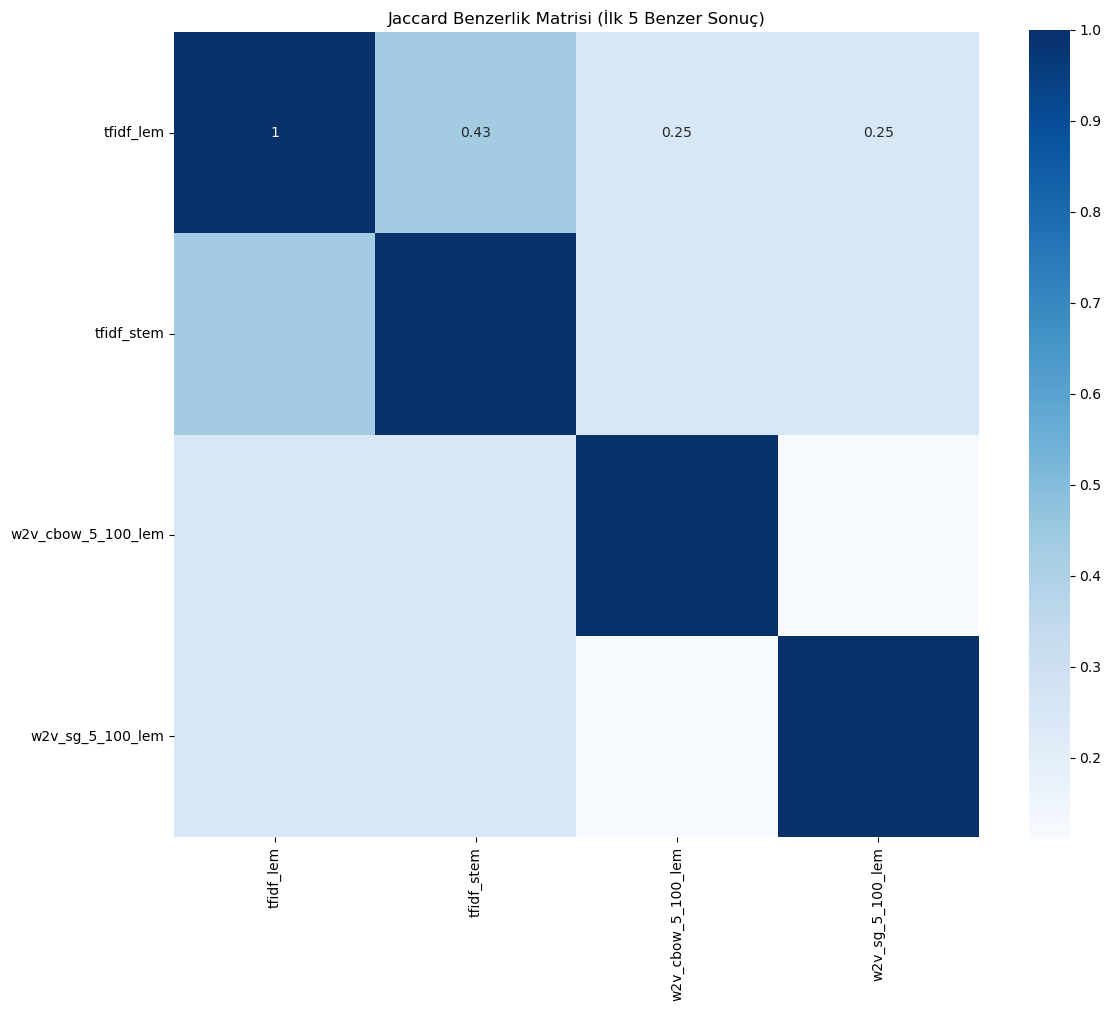

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_matrix.astype(float), annot=True, cmap="Blues", square=True)
plt.title("Jaccard Benzerlik Matrisi (İlk 5 Benzer Sonuç)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [88]:
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    return len(set1 & set2) / len(set1 | set2)


In [94]:
 model_adlari = list(model_top5_dict.keys())  # 18 model
n = len(model_adlari)

jaccard_matrix = pd.DataFrame(index=model_adlari, columns=model_adlari)

for i in range(n):
    for j in range(n):
        m1 = model_adlari[i]
        m2 = model_adlari[j]
        skor = jaccard_similarity(model_top5_dict[m1], model_top5_dict[m2])
        jaccard_matrix.loc[m1, m2] = round(skor, 2)
